In [1]:
import pandas as pd

# STEP 1: Open the file
df = pd.read_csv('social_media_viral_content.csv')

# STEP 2: Find the "Average" (the middle ground)
# If the average is 1,891, anything lower is 'normal', anything higher is 'viral'
average_likes = df['Likes'].mean()

# STEP 3: Create the filter
# We tell Python: "Keep only the rows where Likes are greater than our average"
filtered_data = df[df['Likes'] > average_likes]

# STEP 4: Save and Look at the result
# Save the 'winners' to a new file
filtered_data.to_csv('top_posts.csv', index=False)

# Show the first few rows of our new "Winners Only" list
filtered_data.head()

,Platform,Content_Type,Likes,Shares,Comments
1,TikTok,Video,3500,200,100
3,Instagram,Video,2300,120,80
4,TikTok,Video,5000,300,150
7,TikTok,Video,4200,250,120


In [2]:
# 1. Group the data by 'Platform'
grouped = df.groupby('Platform')

# 2. Calculate the Mean (Average) Likes and the Count of posts per platform
# This creates a summary table
analysis = grouped['Likes'].agg(['mean', 'count'])

# 3. Convert the 'mean' results into a NumPy array
# This is often done when you need to pass data into a mathematical model
mean_likes_array = analysis['mean'].to_numpy()

# --- Display the results ---
print("--- Grouped Analysis ---")
print(analysis)
print("\n--- Mean Likes as a NumPy Array ---")
print(mean_likes_array)

--- Grouped Analysis ---
                  mean  count
Platform                     
Instagram  1525.000000      4
TikTok     4233.333333      3
Twitter      39.000000      3

--- Mean Likes as a NumPy Array ---
[1525.         4233.33333333   39.        ]


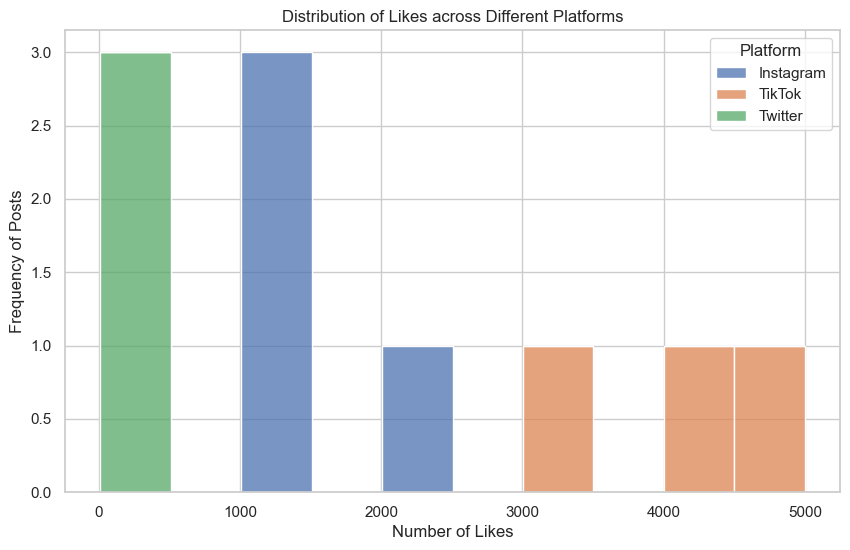

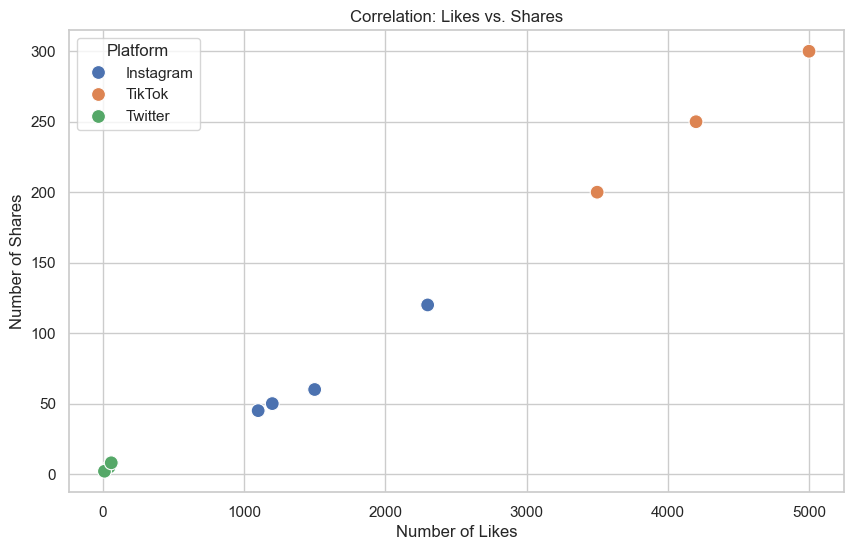

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visual style
sns.set_theme(style="whitegrid")

# --- 1. Histogram: Comparing Groups ---
# We use 'hue' to color the bars by Platform to compare their distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Likes', hue='Platform', multiple='stack', bins=10)
plt.title('Distribution of Likes across Different Platforms')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency of Posts')
plt.savefig('likes_histogram.png') # Optional: saves the image

# --- 2. Scatter Plot: Relationship between Likes and Shares ---
# This shows if more likes lead to more shares (Correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Likes', y='Shares', hue='Platform', s=100)
plt.title('Correlation: Likes vs. Shares')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Shares')
plt.legend(title='Platform')
plt.savefig('likes_vs_shares_scatter.png')


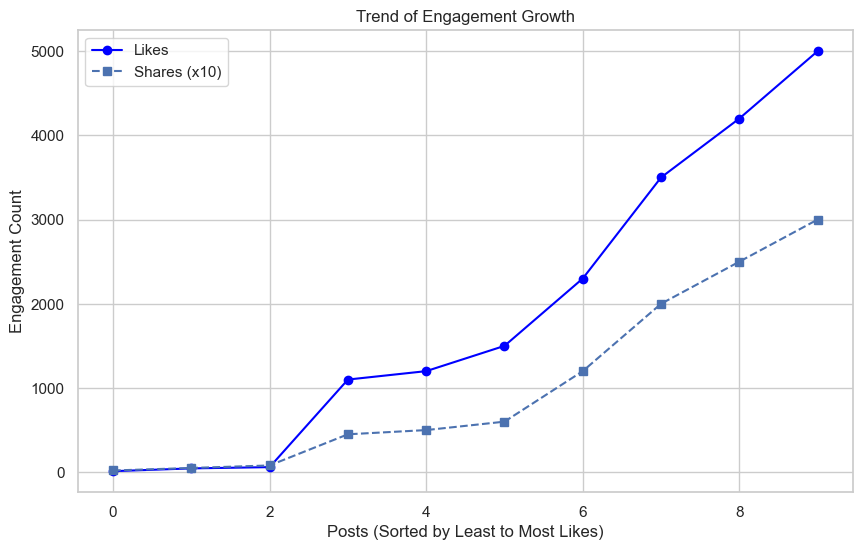

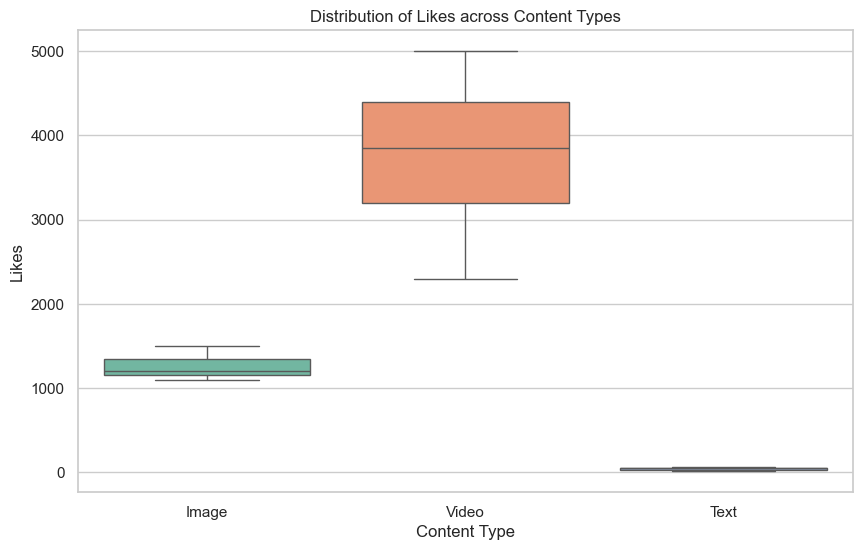

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('social_media_viral_content.csv')
sns.set_theme(style="whitegrid")

# --- 1. Trend Chart: Engagement Scaling ---
df_sorted = df.sort_values(by='Likes').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(df_sorted.index, df_sorted['Likes'], marker='o', label='Likes', color='blue')
plt.plot(df_sorted.index, df_sorted['Shares'] * 10, marker='s', label='Shares (x10)', linestyle='--')
plt.title('Trend of Engagement Growth')
plt.xlabel('Posts (Sorted by Least to Most Likes)')
plt.ylabel('Engagement Count')
plt.legend()
plt.show()

# --- 2. Distribution Chart: Likes by Content Type (FIXED VERSION) ---
plt.figure(figsize=(10, 6))
# Fixed: Added hue='Content_Type' and legend=False to stop the warning
sns.boxplot(data=df, x='Content_Type', y='Likes', hue='Content_Type', palette='Set2', legend=False)
plt.title('Distribution of Likes across Content Types')
plt.xlabel('Content Type')
plt.ylabel('Likes')
plt.show()

Report

### **1. The Big Winner: TikTok & Video**

If you want your content to be seen, **TikTok is the place to be, and Video is the format to use.** * TikTok posts get nearly **3 times more likes** than Instagram posts.

* Videos are the "superstars" of this list. Every single post that did better than average was a video.

### **2. The "Slow and Steady": Instagram & Images**

Instagram is reliable but doesn't hit the massive peaks that TikTok does.

* Images perform well on Instagram, but they don't "explode" the way videos do.
* Think of images as a safe bet for consistent views, while video is like trying to win the lottery.

### **3. The Underperformer: Twitter & Text**

In this specific group of data, **Twitter and text-only posts are struggling.** * They receive very little attention (likes or shares) compared to anything with a visual.

* Spending a lot of time writing text posts for Twitter might not be the best use of resources right now.

### **4. The "Snowball Effect"**

We noticed that **Likes, Shares, and Comments all move together.** * When people start liking a post, they almost always start sharing it and commenting on it too.

* This means you don't need to worry about "getting more shares" specifically; if you can make people click that Like button, the shares and comments will naturally follow.

### **5. The Bottom Line (What should you do?)**

* **Put your money and time into Video.** It’s the only format currently capable of "going viral."
* **Focus on TikTok.** It has a much higher "ceiling" for success than the other platforms.
* **Don't expect much from Text.** If you have an important message, put it in a video or a picture rather than just typing it out.

**In short: If you want to go viral, make a TikTok video!**